In [1]:
suppressMessages(library(dplyr))
suppressMessages(library(Seurat))
suppressMessages(library(viridis))
suppressMessages(library(anndataR))

In [2]:
adata <- read_h5ad("../../results/03_integrate_scrna/integrated.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 95898 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
counts <- t(adata$layers$counts)
colnames(counts) <- adata$obs_names
rownames(counts) <- adata$var_names

sc.obj <- CreateSeuratObject(counts = counts, 
                          meta.data = adata$obs,
                          assay = "RNA")

Warning message:
“Data is of class dgRMatrix. Coercing to dgCMatrix.”


In [5]:
colnames(sc.obj) <- paste0("Cell", 1:ncol(sc.obj))

In [6]:
# add PCA, Harmony and UMAP\
pca <- adata$obsm[['X_pca']]
colnames(pca) <- paste0("PCA_", 1:50)
rownames(pca) <- colnames(sc.obj)
sc.obj[["pca"]] <- CreateDimReducObject(embeddings = pca, key = "PCA_", assay = DefaultAssay(sc.obj))

In [7]:
harmony <- adata$obsm[['X_pca_harmony']]
colnames(harmony) <- paste0("Harmony_", 1:50)
rownames(harmony) <- colnames(sc.obj)
sc.obj[["harmony"]] <- CreateDimReducObject(embeddings = harmony, key = "Harmony_", assay = DefaultAssay(sc.obj))

In [8]:
umap <- adata$obsm[['X_umap']]
colnames(umap) <- paste0("UMAP_", 1:2)
rownames(umap) <- colnames(sc.obj)
sc.obj[["umap"]] <- CreateDimReducObject(embeddings = umap, key = "UMAP_", assay = DefaultAssay(sc.obj))

In [9]:
sc.obj

An object of class Seurat 
15275 features across 95898 samples within 1 assay 
Active assay: RNA (15275 features, 0 variable features)
 1 layer present: counts
 3 dimensional reductions calculated: pca, harmony, umap

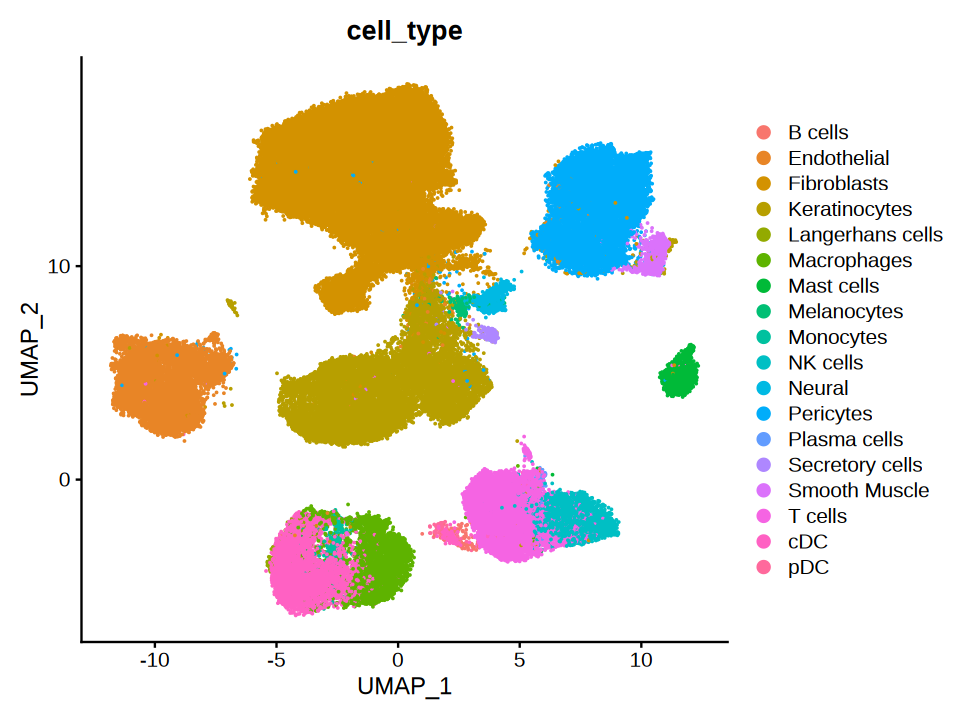

In [10]:
options(repr.plot.height = 6, repr.plot.width = 8)

DimPlot(sc.obj, reduction = "umap", group.by = "cell_type")

In [11]:
saveRDS(sc.obj, '../../results/03_integrate_scrna/integrated.rds')